# Performance Comparison of SHA-256, SHA-1, Blake2b, Blake2s, Blake3 and etc.

### Author: labry (Justin Park)

In [13]:
from hashcompare import Hash
from hashlib import sha1, sha256, blake2b, blake2s, sha3_224, md5
from zlib import crc32
from blake3 import blake3, KEY_LEN, OUT_LEN
import time
import inspect
import numpy as np
import copy

## Simulation Set-up 
#### simulated_packet denotes 10 byte
#### x_range denotes 1 to 1000 times the size of the simulated_packet
#### The smallest being 10 bytes and the largest being 10000 bytes or 10k bytes

In [2]:
x_range = [100,200,300,400,500,600,700,800, 900, 1000]
names_of_hashes = ['sha256','sha1','blake2b','blake2s','sha3_224', 'md5','blake3']

hash_mapper = [Hash(sha256(),names_of_hashes[0]), Hash(sha1(),names_of_hashes[1]),
               Hash(blake2b(),names_of_hashes[2]), Hash(blake2s(), names_of_hashes[3]), 
               Hash(sha3_224(), names_of_hashes[4]), Hash(md5(),names_of_hashes[5]), Hash(blake3(multithreading=True),names_of_hashes[6])]
hash_mapper = np.array(hash_mapper)

test_mapper = [Hash(sha256(),names_of_hashes[0]), Hash(sha1(),names_of_hashes[1]),
               Hash(blake2b(),names_of_hashes[2]), Hash(blake2s(), names_of_hashes[3]), 
               Hash(sha3_224(), names_of_hashes[4]), Hash(md5(),names_of_hashes[5]), Hash(blake3(multithreading=True),names_of_hashes[6])]
test_mapper = np.array(test_mapper)

simulated_packet = "abcdefghij"
packet= []
for weight in x_range:
    packet.append(simulated_packet * weight)
    
for idx, hash_f in enumerate(hash_mapper):

    for i in range(len(x_range)):
        hash_mapper[idx].set_start(time.time())
        for j in range(Hash.NUM_OF_ROUNDS):
            #packet = simulated_packet*i
            hash_f.update(packet[i].encode())
            hash_v = hash_f.digest()

        hash_mapper[idx].set_finish(time.time())

    print("{} {} performed {} operations in {} {} \n".format
        (idx, hash_mapper[idx].get_name(), Hash.NUM_OF_ROUNDS,  len(hash_mapper[idx].get_duration()), hash_mapper[idx].get_duration()))

0 sha256 performed 10000 operations in 10 [0.051950931549072266, 0.07457780838012695, 0.10935187339782715, 0.13966894149780273, 0.1627669334411621, 0.19159388542175293, 0.22446274757385254, 0.2514359951019287, 0.27698183059692383, 0.29852890968322754] 

1 sha1 performed 10000 operations in 10 [0.03095078468322754, 0.04378700256347656, 0.060400962829589844, 0.0708918571472168, 0.08698391914367676, 0.09818601608276367, 0.11117911338806152, 0.12227916717529297, 0.13560891151428223, 0.15138888359069824] 

2 blake2b performed 10000 operations in 10 [0.02978682518005371, 0.042755126953125, 0.05842709541320801, 0.07416701316833496, 0.09024214744567871, 0.09868311882019043, 0.11452817916870117, 0.13200092315673828, 0.1492459774017334, 0.15514683723449707] 

3 blake2s performed 10000 operations in 10 [0.02889275550842285, 0.04517340660095215, 0.06490302085876465, 0.08512282371520996, 0.10033106803894043, 0.11632800102233887, 0.13359594345092773, 0.15184617042541504, 0.1698598861694336, 0.186920

# How many second does it take to perform one hashing?
#### It takes about one millionth of a second for one hashing to be performed.

In [3]:
import base58 

hash_v = np.zeros(len(names_of_hashes),dtype=object)
for idx, hash_f in enumerate(test_mapper):
    test_mapper[idx].set_start(time.time())
    for j in range(100000):
        hash_f.update(packet[0].encode())
        hash_v[idx] = hash_f.digest()
    test_mapper[idx].set_finish(time.time())

for idx, hash_f in enumerate(test_mapper):
    print("{} performed 1 operation in {}".format(test_mapper[idx].get_name(), test_mapper[idx].get_duration()[0]))
    print("{}... is hashed to {} long {}".format(packet[0][0:10], len(hash_v[idx].hex()), hash_v[idx].hex()))
    print("{}".format(str(base58.b58encode(hash_v[idx]))))
    print("\n")


sha256 performed 1 operation in 0.49532485008239746
abcdefghij... is hashed to 64 long 3db7bbbcae506eccb7b8e19dc417a99da8230f3df7db13873ed099c9034e64bd
b'59vN8PzGQzE9Ghdkue7b8dN8r1adt1xAgnqm5uH6LFit'


sha1 performed 1 operation in 0.33294081687927246
abcdefghij... is hashed to 40 long bcdc0cc4ed9f98e1a95b1773d1999011d0a3afb7
b'3dc8H96oesi4gcF4VNo3prf8WHJe'


blake2b performed 1 operation in 0.295382022857666
abcdefghij... is hashed to 128 long 0a5db6d06a87a91c25d900e04379ea765242dfcfb45baa02cab92f4ff0426f1a8ccf21508e3ef6ba373f05cc69be8f8da29035e4c964f19a5c5d23b6453b07c4
b'D2C9dBYuq3sjPnw5mKRnsZHRtgFDUzBKGHNvWBz24sJeDEdR1UdDZnpcdJzm6LLBEcyfHuy3aBvWk5wP16wZwWT'


blake2s performed 1 operation in 0.29537487030029297
abcdefghij... is hashed to 64 long fcc9dba2f9a19ad11ef9861c81e3308244b05507feb9eb1b1880352f4a5a1c96
b'J1nGKDQFZV58sYVYy5gHQAHNSv15enmpJ8QVttkevGtu'


sha3_224 performed 1 operation in 0.6694610118865967
abcdefghij... is hashed to 56 long 7461be045927bc110129888751bc7ef75d1226

In [4]:
import base58 

hash_v = np.zeros(len(names_of_hashes),dtype=object)
for idx, hash_f in enumerate(test_mapper):
    if idx !=2 and idx !=6:
        continue
        
    test_mapper[idx].set_start(time.time())
    for j in range(100000):
        p_list = [p.encode() for p in packet[1:]]
        #print(p_list)
        hash_f.update(packet[0].encode(), p_list)
        hash_v[idx] = hash_f.digest()
    test_mapper[idx].set_finish(time.time())

for idx, hash_f in enumerate(test_mapper):
    if idx !=2 and idx !=6:
        continue
    print("{} performed 1 operation in {}".format(test_mapper[idx].get_name(), test_mapper[idx].get_duration()[0]))
    print("{}... is hashed to {} long {}".format(packet[0][0:10], len(hash_v[idx].hex()), hash_v[idx].hex()))
    print("{}".format(str(base58.b58encode(hash_v[idx]))))
    print("\n")


blake2b performed 1 operation in 0.295382022857666
abcdefghij... is hashed to 128 long 7e9270b517ed92ed9e2d41132a40e2e92d2e2bb02d6c727a04a5643016fe0021abc128e8bc2dab749bd940953dbecce6c0bfde84a1ce0b413652fe31e8f13e36
b'3XmsbBbvwgXF4nEve1xrtcNrDXUTR6wTpQi1HKq57iV87xQyRcxT1CUCc6iu5i41uu5CxsT9CLKYm3qgdVbecFdF'


blake3 performed 1 operation in 0.5109708309173584
abcdefghij... is hashed to 64 long ce9f65ddf00653eadb545274c4f76ebb5f68c81fbcce68ca5da8c8e4db4d215d
b'EuZxZw3PtQN3s7ihz4NHByTgdPFHPJA4ZgzJYiLjTZek'




## Measure arithmetic calculations one million times

In [5]:
start = time.time()
for i in range(1000000):
    finish = time.time()
    random1 = finish * 12 / 3.0 + 1234
    random2 = start * 124 / 4.2  + 234
    random3 = finish * 324 / 3.4 + 2344
    random4 = start * 2346 / 5.2 + 424324
    random6 = finish * 42310 / 13.0 + 23423432
    random7 = start * 12349 / 14.2 + 232.033
    random8 = finish * 4448 / 13.4 
    random9 = start * 12347 / 25.2
    duration = finish - start

print("performed operation in {} \n".format(duration))

performed operation in 1.0558910369873047 



## Graph Analysis

In [6]:
default_duration = np.array(hash_mapper[0].get_duration())

import pandas as pd
import matplotlib.pyplot as plt
default_duration = pd.DataFrame(default_duration)

        sha256      sha1   blake2b   blake2s  sha3_224       md5    blake3
100   0.051951  0.030951  0.029787  0.028893  0.062357  0.033022  0.047883
200   0.074578  0.043787  0.042755  0.045173  0.091918  0.046133  0.056864
300   0.109352  0.060401  0.058427  0.064903  0.126383  0.064581  0.067995
400   0.139669  0.070892  0.074167  0.085123  0.157624  0.075723  0.079859
500   0.162767  0.086984  0.090242  0.100331  0.183703  0.090324  0.084348
600   0.191594  0.098186  0.098683  0.116328  0.220666  0.101418  0.092014
700   0.224463  0.111179  0.114528  0.133596  0.249231  0.115609  0.099675
800   0.251436  0.122279  0.132001  0.151846  0.285532  0.132609  0.111038
900   0.276982  0.135609  0.149246  0.169860  0.305955  0.151015  0.120309
1000  0.298529  0.151389  0.155147  0.186921  0.346080  0.165777  0.119780


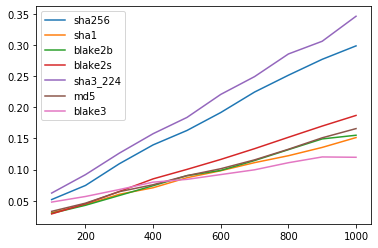

In [10]:

#print(len(x_range))
zero_data = np.zeros(shape=(12,1))
zero_series = pd.Series(zero_data[:,0])
#print(zero_series)
plot_result2 = pd.DataFrame({names_of_hashes[0]: zero_series, names_of_hashes[1]: zero_series,
                   names_of_hashes[2]: zero_series, names_of_hashes[3]: zero_series}, index=x_range)
#print(plot_result2)
for idx, hash_f in enumerate(hash_mapper):
    plot_result2[names_of_hashes[idx]] = np.array(hash_mapper[idx].get_duration()[0])
    #print(hash_mapper[idx].get_duration())

plot_result2.plot()
print(plot_result2)    

#### Sha-256 is used as the baseline performance measurement unit and the Y-axis shows the relative time they needed to perform a hashing. X-axis show the packet size and the unit is 10 bytes, meaning 200 denotes 2k bytes, 400 4k bytes and so on.
#### The graph shows that sha-1 has the best performance for larger packets. However, sha-1 is known to be vulnerable due to high probability of hash colision.

In [11]:
plot_result = pd.DataFrame(columns=names_of_hashes)
relative_performance = {}
for idx, hash_f in enumerate(hash_mapper):
    hash_mapper[idx].duration = pd.DataFrame(hash_mapper[idx].get_duration())
    hash_mapper[idx].duration.name = hash_mapper[idx].get_name()

    relative_performance.update({idx: hash_mapper[idx].get_duration()/default_duration})
    alist = []
    for item in relative_performance[idx].values:
        alist.append(item)
    col_name = hash_mapper[idx].get_name()
    data = pd.Series(alist,name=col_name)
    plot_result[col_name] = data.astype(float)


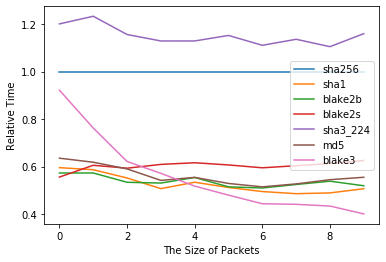

In [12]:
ax = plot_result.plot()
ax.set_xlabel("The Size of Packets")
ax.set_ylabel("Relative Time")
ax.legend(loc='center right')
plt.show()